## Setup the graph network

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
v = [{'id':0,'name':'alan'},{'id':1,'name':'betty'},{'id':2,'name':'chris'},
     {'id':3,'name':'diane'},{'id':4,'name':'erin'},{'id':5,'name':'frank'},
     {'id':6,'name':'gertrude'},{'id':7,'name':'harry'},{'id':8,'name':'iggy'}]

In [3]:
v

[{'id': 0, 'name': 'alan'},
 {'id': 1, 'name': 'betty'},
 {'id': 2, 'name': 'chris'},
 {'id': 3, 'name': 'diane'},
 {'id': 4, 'name': 'erin'},
 {'id': 5, 'name': 'frank'},
 {'id': 6, 'name': 'gertrude'},
 {'id': 7, 'name': 'harry'},
 {'id': 8, 'name': 'iggy'}]

In [4]:
e = [(0,2),(1,2),(0,4),(2,5),(2,7),(2,6),(6,8),(3,4),(4,6),(1,5),(0,8),(5,8),(4,8)]

In [5]:
# Initialize Connections
for vi in v:
    vi['connections']=[]

In [6]:
v

[{'connections': [], 'id': 0, 'name': 'alan'},
 {'connections': [], 'id': 1, 'name': 'betty'},
 {'connections': [], 'id': 2, 'name': 'chris'},
 {'connections': [], 'id': 3, 'name': 'diane'},
 {'connections': [], 'id': 4, 'name': 'erin'},
 {'connections': [], 'id': 5, 'name': 'frank'},
 {'connections': [], 'id': 6, 'name': 'gertrude'},
 {'connections': [], 'id': 7, 'name': 'harry'},
 {'connections': [], 'id': 8, 'name': 'iggy'}]

In [7]:
# Make the connections
for i,j in e:
    v[i]['connections'].append(v[j]['name'])
    v[j]['connections'].append(v[i]['name'])

In [8]:
v

[{'connections': ['chris', 'erin', 'iggy'], 'id': 0, 'name': 'alan'},
 {'connections': ['chris', 'frank'], 'id': 1, 'name': 'betty'},
 {'connections': ['alan', 'betty', 'frank', 'harry', 'gertrude'],
  'id': 2,
  'name': 'chris'},
 {'connections': ['erin'], 'id': 3, 'name': 'diane'},
 {'connections': ['alan', 'diane', 'gertrude', 'iggy'],
  'id': 4,
  'name': 'erin'},
 {'connections': ['chris', 'betty', 'iggy'], 'id': 5, 'name': 'frank'},
 {'connections': ['chris', 'iggy', 'erin'], 'id': 6, 'name': 'gertrude'},
 {'connections': ['chris'], 'id': 7, 'name': 'harry'},
 {'connections': ['gertrude', 'alan', 'frank', 'erin'],
  'id': 8,
  'name': 'iggy'}]

## Create graph in NetworkX

In [9]:
G = nx.Graph()

In [10]:
# Add nodes
for vi in v:
    G.add_node(vi['id'], label=vi['name'])

# Add edges
G.add_edges_from(e)

In [11]:
G.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [12]:
G.edges()

[(0, 8),
 (0, 2),
 (0, 4),
 (1, 2),
 (1, 5),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 4),
 (4, 8),
 (4, 6),
 (5, 8),
 (6, 8)]

## Find degrees

In [13]:
nx.degree(G)

{0: 3, 1: 2, 2: 5, 3: 1, 4: 4, 5: 3, 6: 3, 7: 1, 8: 4}

(array([ 2.,  0.,  1.,  0.,  0.,  3.,  0.,  2.,  0.,  1.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

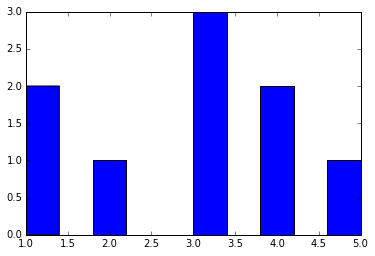

In [14]:
plt.hist(nx.degree(G).values())

## Plot Graph

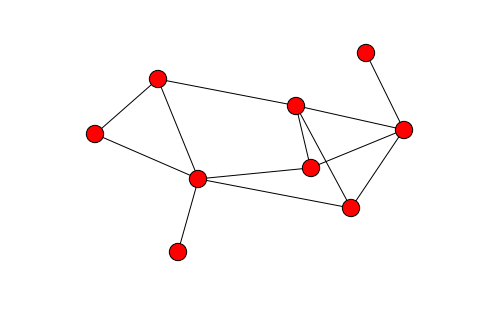

In [15]:
nx.draw(G)

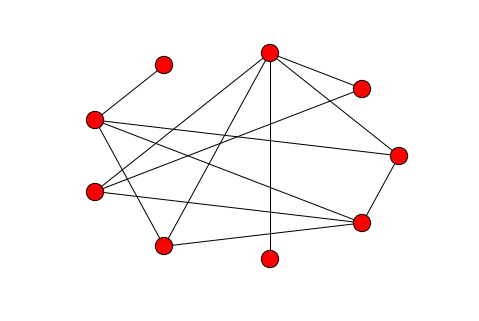

In [16]:
nx.draw_circular(G)

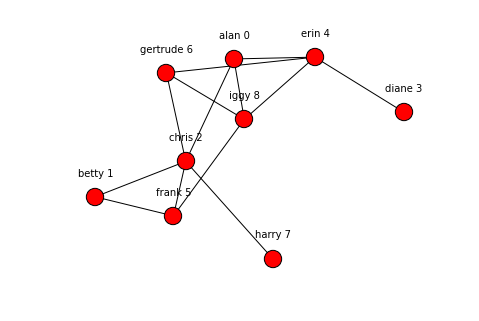

In [17]:
# Add labels to plot
pos = nx.spring_layout(G)
nx.draw(G, pos)

pos_counter = 0
for vi in v:
    lab_text = ' '.join([vi['name'],str(vi['id'])])
    x,y = pos[pos_counter]
    plt.text(x,y+0.1,s=lab_text, horizontalalignment='center')
    pos_counter += 1

In [18]:
G.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [19]:
node_size_standard = len(G.nodes())*[300]

## Make Connection Recommendations

In [20]:
# Make recommendations
def triangle_completion(user_id):
    nested_list = [x['connections'] for x in v if x['name'] in user_id['connections']]
    unnested_list = [x for y in nested_list for x in y]
    unique_list = list(set(unnested_list))
    unique_list_nonself = [x for x in unique_list if x != user_id['name'] and x not in user_id['connections']]
    return(unique_list_nonself)

In [21]:
triangle_completion(v[0])

['gertrude', 'frank', 'diane', 'betty', 'harry']

## Degree Centrality

In [22]:
print(nx.degree_centrality(G)) # Proportion of shortest paths that go through specified vertex
# note that the lowest with 9 vertices is 1/8 = 0.125

{0: 0.375, 1: 0.25, 2: 0.625, 3: 0.125, 4: 0.5, 5: 0.375, 6: 0.375, 7: 0.125, 8: 0.5}


## Coloring

In [23]:
# Soon to be implemented in networkx, but here is a work around:

In [24]:
# The great thing about networkx is all the built in functionality
for n in range(9):
    print(G.neighbors(n))

[8, 2, 4]
[2, 5]
[0, 1, 5, 6, 7]
[4]
[0, 8, 3, 6]
[8, 1, 2]
[8, 2, 4]
[2]
[0, 4, 5, 6]


In [25]:
colors = ['Red', 'Blue', 'Green', 'Yellow',  'Black', 'Orange', 'White']

def coloring(node, color):
   for neighbor in G.neighbors(node):
       color_of_neighbor = colors_of_nodes.get(neighbor, None)
       if color_of_neighbor == color:
          return False

   return True

def get_color_for_node(node):
    for color in colors:
       if coloring(node, color):
          return color

In [26]:
colors_of_nodes={}
for node in G.nodes():
        colors_of_nodes[node] = get_color_for_node(node)

print colors_of_nodes

{0: 'Red', 1: 'Red', 2: 'Blue', 3: 'Red', 4: 'Blue', 5: 'Green', 6: 'Red', 7: 'Red', 8: 'Yellow'}


## Shortest path

In [27]:
print(nx.shortest_path(G,source=1,target=4))

[1, 2, 0, 4]


In [108]:
# See:
# http://networkx.lanl.gov/reference/algorithms.html
# for all the networkx algorithms!